<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;"><a href="http://www.editorialuoc.cat/mineria-de-datos" target="_blank">Minería de datos: Modelos y algoritmos</a></p>
<p style="margin: 0; text-align:right;">Estudios de Informática, Multimedia y Telecomunicación</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Universitat Oberta de Catalunya (<b>UOC</b>)</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# CH15EJ1 *Bagging*

En este ejemplo se muestra como generar un clasificador arbol de decisión y como mejorarlo con técnicas de *bagging*.

## 1. Instalar los packages necesarios 

In [1]:
if(!require(mlbench)){
    install.packages('mlbench',repos='http://cran.es.r-project.org')
    require(mlbench)
}
if(!require(car)){
    install.packages('car',repos='http://cran.es.r-project.org')
    require(car)
}
if(!require(caret)){
    install.packages('caret',repos='http://cran.es.r-project.org')
    require(caret)
}
if(!require(caretEnsemble)){
    install.packages('caretEnsemble',repos='http://cran.es.r-project.org')
    require(caretEnsemble)
}
if(!require(e1071)){
    install.packages('e1071',repos='http://cran.es.r-project.org')
    require(e1071)
}
if(!require(rpart)){
    install.packages('rpart',repos='http://cran.es.r-project.org')
    require(rpart)
}
if(!require(ipred)){
    install.packages('ipred',repos='http://cran.es.r-project.org')
    require(ipred)
}
if(!require(plyr)){
    install.packages('plyr',repos='http://cran.es.r-project.org')
    require(plyr)
}
set.seed(17)

Loading required package: mlbench

Loading required package: car

Warning message:
“package ‘car’ was built under R version 3.5.2”
Loading required package: carData

Warning message:
“package ‘carData’ was built under R version 3.5.2”
Loading required package: caret

Warning message:
“package ‘caret’ was built under R version 3.5.2”
Loading required package: lattice

Warning message:
“package ‘lattice’ was built under R version 3.5.2”
Loading required package: ggplot2

Warning message:
“package ‘ggplot2’ was built under R version 3.5.2”
Loading required package: caretEnsemble

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘caretEnsemble’”
also installing the dependency ‘pbapply’





  There is a binary version available but the source version is later:
        binary source needs_compilation
pbapply  1.4-2  1.4-3             FALSE


The downloaded binary packages are in
	/var/folders/ng/861lyhkn7n71xz1qgsbxbk40x59kk6/T//RtmpTD9GCe/downloaded_packages


installing the source package ‘pbapply’


Loading required package: caretEnsemble

Warning message:
“package ‘caretEnsemble’ was built under R version 3.5.2”

Attaching package: ‘caretEnsemble’


The following object is masked from ‘package:ggplot2’:

    autoplot


Loading required package: e1071

Warning message:
“package ‘e1071’ was built under R version 3.5.2”
Loading required package: rpart

Warning message:
“package ‘rpart’ was built under R version 3.5.2”
Loading required package: ipred

Warning message:
“package ‘ipred’ was built under R version 3.5.2”
Loading required package: plyr

Warning message:
“package ‘plyr’ was built under R version 3.5.2”


## 2. Carga de los datos

In [2]:
wdbc=read.table(url("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"), 
  sep=",", header=FALSE)

dim(wdbc)

[1] 699  11

### Preparamos los datos para crear el modelo

En concreto:
- Corregir valores '?'
- Eliminar datos ausentes

In [3]:
wdbc$V7=as.numeric(recode(wdbc$V7, "'?'=NA"))
wdbc=wdbc[complete.cases(wdbc),]
dataset <- wdbc[,(2:11)]

## 3. Creación del modelo

### Parámetros de creación del modelo

In [4]:
# Paso de kfolds
control <- trainControl(method="repeatedcv", number=10, repeats=3, savePredictions = TRUE)
# Metrica de calidad % instancias correctas sobre total
metric <- "Accuracy"

### Creamos un primer modelo de árbol.

In [5]:
model.cart <- train(as.factor(V11)~., data=dataset, method="rpart", metric=metric, trControl=control)

### Matriz de confusión

In [6]:
confusionMatrix(model.cart)

Cross-Validated (10 fold, repeated 3 times) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
          Reference
Prediction    2    4
         2 61.5  2.8
         4  3.5 32.2
                            
 Accuracy (average) : 0.9375


###  Mostramos todas sus características.

CART 

683 samples
  9 predictor
  2 classes: '2', '4' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 615, 615, 615, 614, 615, 614, ... 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa    
  0.02092050  0.9375380  0.8636275
  0.05439331  0.9209633  0.8278766
  0.79079498  0.8381190  0.5828366

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.0209205.


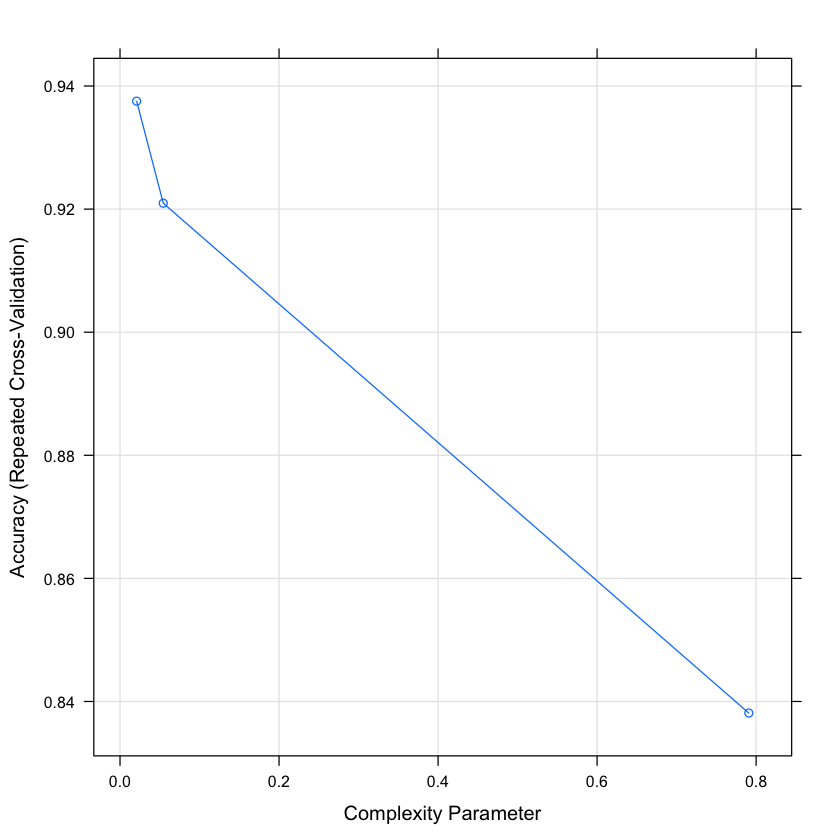

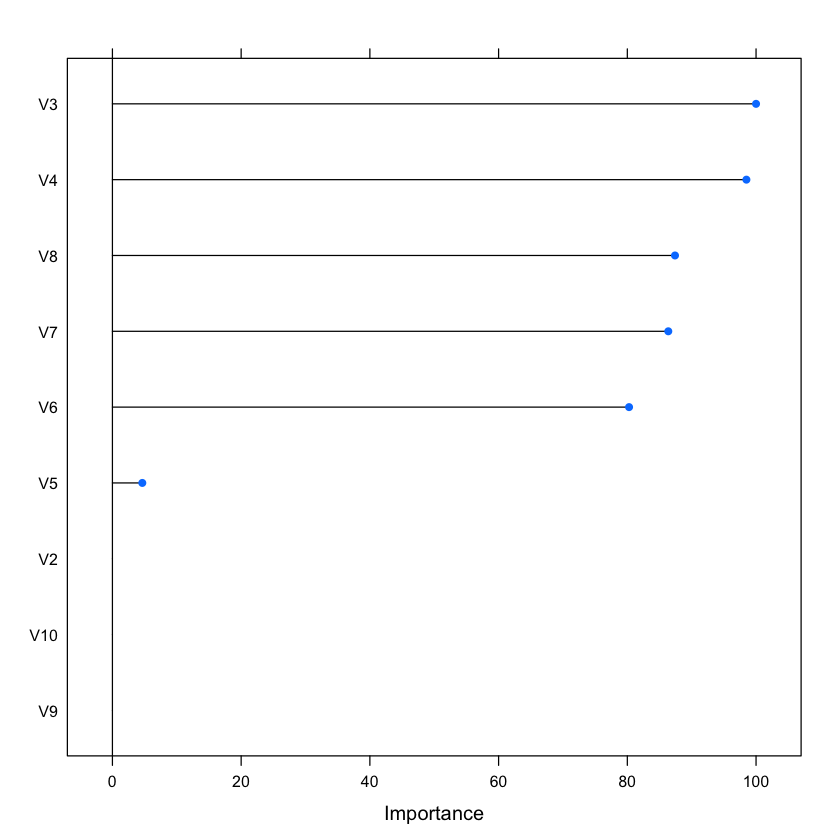

In [7]:
print(model.cart)
plot(model.cart)
ctreeVarImp = varImp(model.cart)
plot(ctreeVarImp)

## 4. Creación de un árbol con el método *bagged*

In [8]:
model.treebag <- train(as.factor(V11)~., data=dataset, method="treebag",metric=metric, trControl=control)

### Matriz de confusión

In [9]:
confusionMatrix(model.treebag)

Cross-Validated (10 fold, repeated 3 times) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
          Reference
Prediction    2    4
         2 62.6  2.1
         4  2.4 32.9
                            
 Accuracy (average) : 0.9551


###  Mostramos todas sus características.

Bagged CART 

683 samples
  9 predictor
  2 classes: '2', '4' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 615, 614, 614, 614, 615, 615, ... 
Resampling results:

  Accuracy   Kappa    
  0.9590356  0.9105653

 


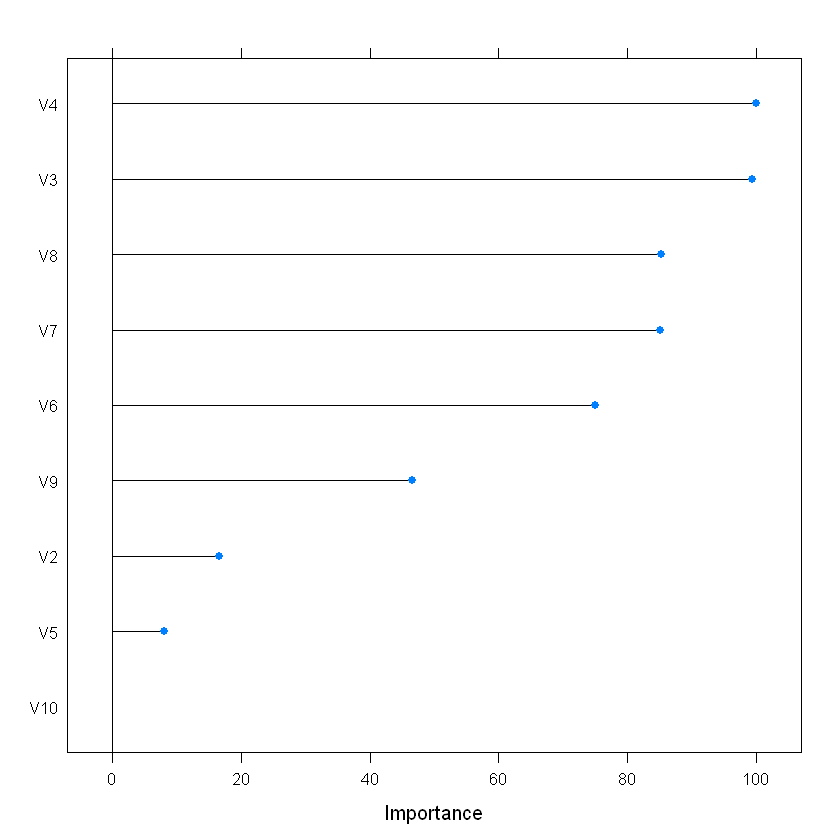

In [10]:
print(model.treebag)
ctreeVarImp = varImp(model.treebag)
plot(ctreeVarImp)

## 5. Sumarizamos y comparamos los datos de ambos modelos


Call:
summary.resamples(object = bagging_results)

Models: treebag, cart 
Number of resamples: 30 

Accuracy 
             Min.   1st Qu.    Median      Mean   3rd Qu. Max. NA's
treebag 0.8970588 0.9411765 0.9562020 0.9550647 0.9705882    1    0
cart    0.8970588 0.9264706 0.9275362 0.9375380 0.9557177    1    0

Kappa 
             Min.   1st Qu.    Median      Mean   3rd Qu. Max. NA's
treebag 0.7680312 0.8725682 0.9020986 0.9015175 0.9352953    1    0
cart    0.7816514 0.8387097 0.8426390 0.8636275 0.9016055    1    0


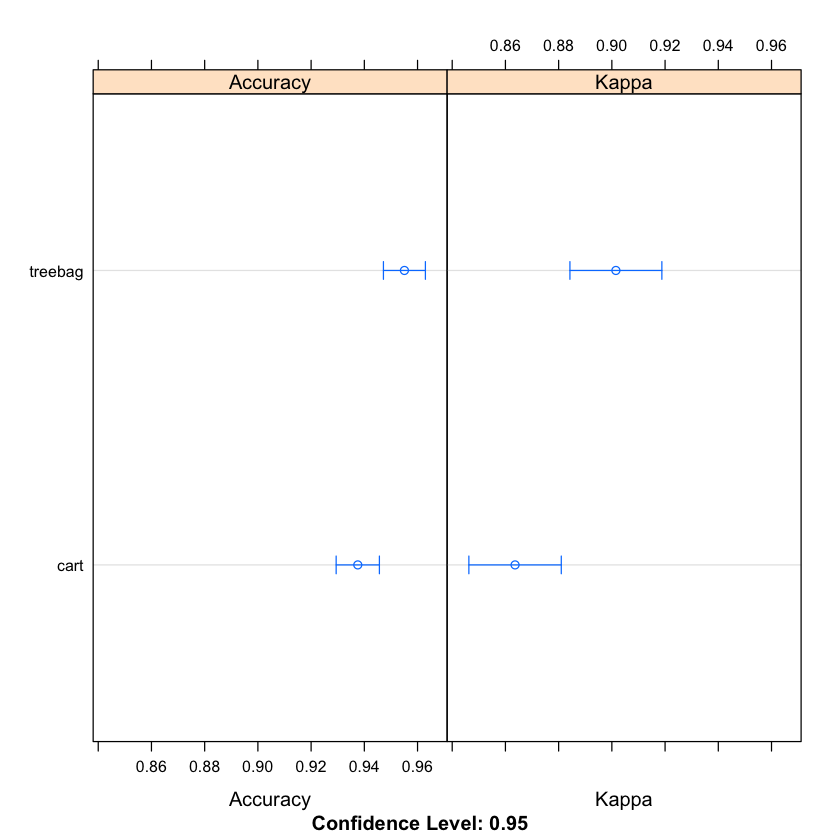

In [10]:
bagging_results <- resamples(list(treebag=model.treebag, cart=model.cart))
summary(bagging_results)
dotplot(bagging_results)